In [4]:
import torch
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms
from torchvision.datasets import MNIST, CIFAR10
import numpy as np
import matplotlib.pyplot as plt

In [5]:
class Encoder(torch.nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = torch.nn.Linear(input_size, 512)
        self.fc2 = torch.nn.Linear(512, 64)
        self.fc3 = torch.nn.Linear(64, 16)
        self.fc4 = torch.nn.Linear(16, 2)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [6]:
class Decoder(torch.nn.Module):
    def __init__(self, output_size):
        super().__init__()
        self.fc1 = torch.nn.Linear(2, 16)
        self.fc2 = torch.nn.Linear(16, 64)
        self.fc3 = torch.nn.Linear(64, 512)
        self.fc4 = torch.nn.Linear(512, output_size)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.tanh(self.fc4(x))  # -1～1に変換
        return x

In [7]:
class AutoEncoder(torch.nn.Module):
    def __init__(self, org_size):
        super().__init__()
        self.enc = Encoder(org_size)
        self.dec = Decoder(org_size)
    def forward(self, x):
        x = self.enc(x)  # エンコード
        x = self.dec(x)  # デコード
        return x

In [8]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = MNIST('./datasets', train=True, transform=transform, download=True)
testset = MNIST('./datasets', train=False, transform=transform, download=True)

batch_size = 50
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

In [9]:
def train(net, criterion, optimizer, epochs, trainloader):
    losses = []
    output_and_label = []

    for epoch in range(1, epochs+1):
        print(f'epoch: {epoch}, ', end='')
        running_loss = 0.0
        for counter, (img, _) in enumerate(trainloader, 1):
            optimizer.zero_grad()
            img = img.reshape(-1, input_size)
            output = net(img)
            loss = criterion(output, img)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss / counter
        losses.append(avg_loss)
        print('loss:', avg_loss)
        output_and_label.append((output, img))
    print('finished')
    return output_and_label, losses

input_size = 28 * 28
net = AutoEncoder(input_size)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
EPOCHS = 10

output_and_label, losses = train(net, criterion, optimizer, EPOCHS, trainloader)

epoch: 1, loss: 0.3102892673139771
epoch: 2, loss: 0.2463723403463761
epoch: 3, loss: 0.240121615032355
epoch: 4, loss: 0.22876149032264947
epoch: 5, loss: 0.22136562063048285
epoch: 6, loss: 0.21748922703166804
epoch: 7, loss: 0.21429576660195987
epoch: 8, loss: 0.21174240579207737
epoch: 9, loss: 0.20958234862734873
epoch: 10, loss: 0.20754790391772984
finished


In [15]:
sampleloader = DataLoader(testset, batch_size=1500)
iterator = iter(sampleloader)
img, label = next(iterator)
z = net.enc(img.reshape(-1, 28 * 28))
z = z.detach().numpy()  # 後から簡単に使えるようにするための処理
print(z.shape)  # (1500, 2)

(1500, 2)


In [16]:
set_list = [set() for x in range(10)]
for coord, lbl in zip(z.tolist(), label):
    set_list[lbl].add(tuple(coord))

In [17]:
for idx in range(10):
    print(f'items in set_list[{idx}]:')
    for cnt, item in enumerate(set_list[idx]):
        print(item)
        if cnt > 5:
            break

items in set_list[0]:
(-5.1719536781311035, -0.6980337500572205)
(-2.245659351348877, 4.3495354652404785)
(-1.5043927431106567, 3.434438467025757)
(-2.584047317504883, 2.123633861541748)
(-6.470077037811279, -1.3299528360366821)
(-3.309208393096924, 2.9673666954040527)
(-3.768070697784424, 5.4083638191223145)
items in set_list[1]:
(-23.812469482421875, -5.1249098777771)
(-25.31846046447754, -7.63134765625)
(-18.3377742767334, -3.289433717727661)
(-11.09972858428955, -10.171854019165039)
(-26.54945182800293, -6.146400451660156)
(-22.07912826538086, -11.737427711486816)
(-14.820743560791016, -2.832352638244629)
items in set_list[2]:
(-8.333215713500977, -0.922318160533905)
(-2.4533743858337402, -2.13049054145813)
(-4.62071418762207, -3.369741201400757)
(-7.626637935638428, -1.965363621711731)
(-3.7543540000915527, -2.7204673290252686)
(-8.988319396972656, -8.29041862487793)
(-2.8770523071289062, 0.2810632586479187)
items in set_list[3]:
(-5.043924808502197, -2.5595686435699463)
(-4.29695

['0: r', '1: g', '2: b', '3: c', '4: k', '5: y', '6: orange', '7: lightgreen', '8: hotpink', '9: yellow']


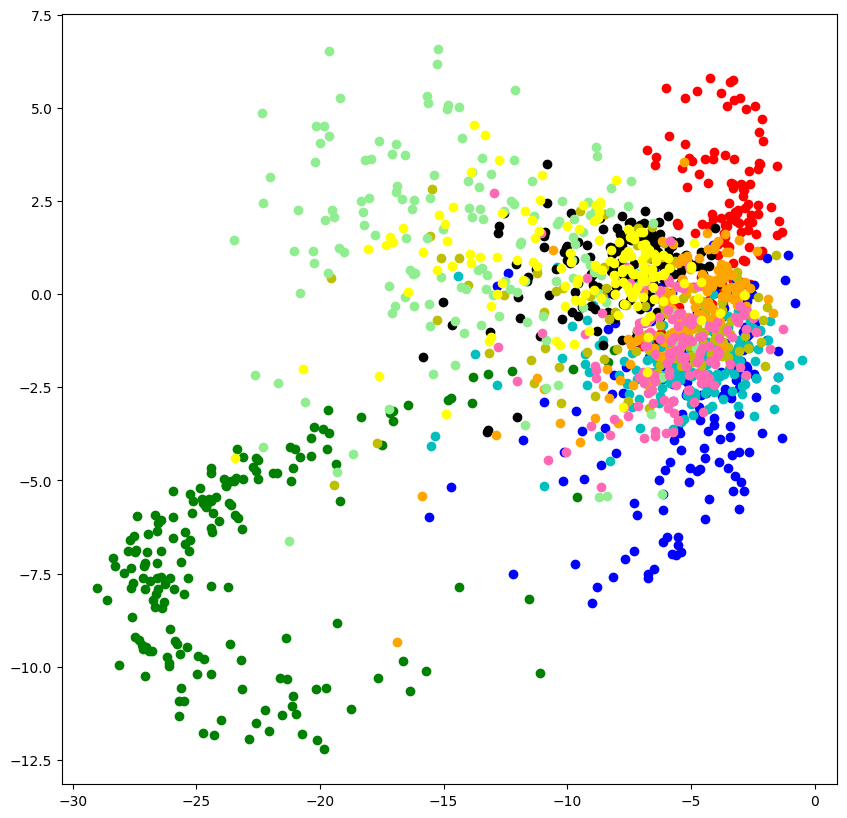

In [18]:
colorlist = ["r", "g", "b", "c", "k", "y", "orange", "lightgreen", "hotpink", "yellow"]
plt.figure(figsize=(10, 10))
for idx in range(10):
    for x, y in set_list[idx]:
        plt.scatter(x, y, c=colorlist[idx])
description = [f"{idx}: {colorlist[idx]}" for idx in range(10)]
print(description)

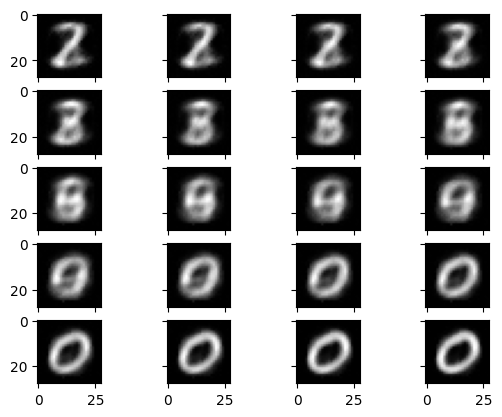

In [22]:
import numpy as np
import torch
import matplotlib.pyplot as plt

xx = np.full(100, -5)
yy = np.linspace(-5, 5, 20)

fig = plt.figure()

for i, (x, y) in enumerate(zip(xx, yy)):
    z = net.dec(torch.FloatTensor([x, y]))
    z = z.reshape(28, 28)
    ax = fig.add_subplot(5, 4, i+1)
    ax.imshow(z.detach().numpy(), cmap="gray")
    ax.set_aspect("equal")
    ax.label_outer()
    